In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(64,)),
    Dense(16,activation='relu'),
    Dense(16,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='softmax')
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
Total params: 1,720
Trainable params: 1,720
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [7]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 66,410
Trainable params: 66,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)#beta_1=0.910,beta_2=0.99)
acc = tf.keras.metrics.Accuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
#loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits='False')
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=[acc])

In [9]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)

sparse_categorical_crossentropy


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [12]:
# Print the shape of the training data
train_images.shape, test_images.shape, train_labels.shape


((60000, 28, 28), (10000, 28, 28), (60000,))

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
train_labels[0]

9

In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.
test_images = test_images/255.

label: Ankle boot


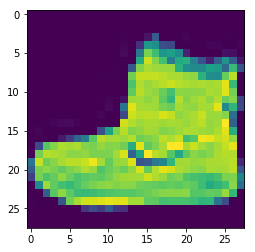

In [15]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
print("label:",labels[train_labels[i]])

In [16]:
#train_images = np.expand_dims(train_images, -1)
#test_images = np.expand_dims(test_images, -1)

#### Fit the model

In [17]:
# Fit the model
model = Sequential([
    Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])
# Define the model optimizer, loss function and metrics
#opt = tf.keras.optimizers.Adam(learning_rate=0.005)#beta_1=0.910,beta_2=0.99)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
#loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits='False')
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=[acc,mae])

model.fit(train_images[...,np.newaxis], train_labels,epochs=10,batch_size=256,verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 54s - loss: 0.6829 - sparse_categorical_accuracy: 0.7668 - mean_absolute_error: 4.4200
Epoch 2/10
60000/60000 - 52s - loss: 0.4312 - sparse_categorical_accuracy: 0.8451 - mean_absolute_error: 4.4200
Epoch 3/10
60000/60000 - 52s - loss: 0.3786 - sparse_categorical_accuracy: 0.8650 - mean_absolute_error: 4.4200
Epoch 4/10
60000/60000 - 51s - loss: 0.3509 - sparse_categorical_accuracy: 0.8738 - mean_absolute_error: 4.4200
Epoch 5/10
60000/60000 - 51s - loss: 0.3296 - sparse_categorical_accuracy: 0.8823 - mean_absolute_error: 4.4200
Epoch 6/10
60000/60000 - 51s - loss: 0.3118 - sparse_categorical_accuracy: 0.8878 - mean_absolute_error: 4.4200
Epoch 7/10
60000/60000 - 51s - loss: 0.2983 - sparse_categorical_accuracy: 0.8927 - mean_absolute_error: 4.4200
Epoch 8/10
60000/60000 - 51s - loss: 0.2856 - sparse_categorical_accuracy: 0.8973 - mean_absolute_error: 4.4200
Epoch 9/10
60000/60000 - 50s - loss: 0.2759 - sparse_categorical_accuracy: 0.8997

#### Plot training history

In [19]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(model.history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.682887,0.766850,4.420000
1,0.431175,0.845083,4.420000
2,0.378567,0.865033,4.420001
3,0.350883,0.873850,4.419999
4,0.329563,0.882333,4.420000


Text(0, 0.5, 'loss')

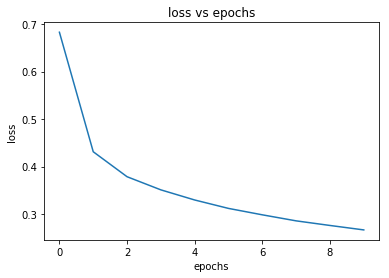

In [20]:
# Make a plot for the loss
plt.plot(df['loss'])
plt.title("loss vs epochs")
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'sparse_categorical_accuracy')

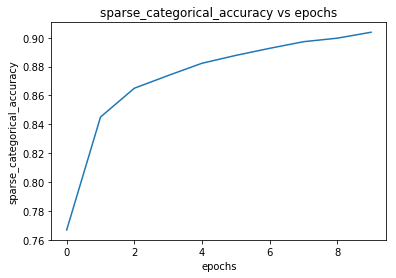

In [21]:
# Make a plot for the accuracy
plt.plot(df['sparse_categorical_accuracy'])
plt.title("sparse_categorical_accuracy vs epochs")
plt.xlabel("epochs")
plt.ylabel("sparse_categorical_accuracy")

Text(0, 0.5, 'mean_absolute_error')

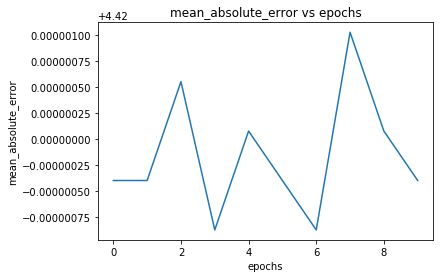

In [22]:
# Make a plot for the additional metric
plt.plot(df['mean_absolute_error'])
plt.title("mean_absolute_error vs epochs")
plt.xlabel("epochs")
plt.ylabel("mean_absolute_error")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [23]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [25]:
# Evaluate the model
test_loss, test_acc, test_mae = model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)

10000/1 - 5s - loss: 0.3078 - sparse_categorical_accuracy: 0.8731 - mean_absolute_error: 4.4200


#### Make predictions from the model

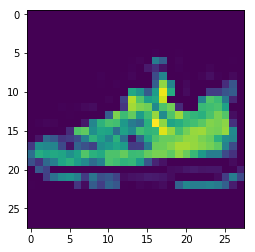

Label: Sneaker


In [26]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [38]:
# Get the model predictions
pred = model.predict(test_images[...,np.newaxis]).argmax(axis=1)

True label: Ankle boot Predicted: Ankle boot


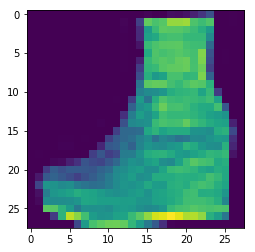

In [50]:
random_index = np.random.choice(test_images.shape[0])
plt.imshow(test_images[random_index])#.reshape(28,28))
print("True label: %s Predicted: %s"%(labels[test_labels[random_index]],labels[pred[random_index]]))